In [129]:
import torch
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx
import networkx as nx                                                           
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Linear
from torch_geometric.nn import GCNConv

In [130]:
dataset = KarateClub()
data = dataset[0]
print(dataset.num_features)
print(dataset.num_classes)
print(dataset.num_edge_features)

34
4
0


In [131]:
print(data.x) #shape num_features x num_features
print(data.edge_index.shape)
print(data.y) #which of the 4 classes

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
torch.Size([2, 156])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [132]:
print(data.num_edges)
print(data.num_nodes)
print(data.is_directed())
print(data.edge_attr) #not present

156
34
False
None


In [133]:
import pandas as pd

node_features_df = pd.DataFrame(data.x.numpy(), columns=[f'feature_{i}' for i in range(data.x.shape[1])])
node_features_df['node'] = node_features_df.index
node_features_df.set_index('node', inplace=True)


edge_index_df = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])


labels_df = pd.DataFrame(data.y.numpy(), columns=['label'])
labels_df['node'] = labels_df.index
labels_df.set_index('node', inplace=True)

In [134]:
node_features_df.head() #one hot encoding

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33
node,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
print(edge_index_df.shape)
edge_index_df.head()

(156, 2)


,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [136]:
print(labels_df.shape)
labels_df.head()

(34, 1)


,label
node,
0,1
1,1
2,1
3,1
4,3


In [137]:
num_countries = 4
np.random.seed(42)
countries = torch.tensor(np.random.choice(num_countries, data.num_nodes))
data.y = countries

In [138]:
print(data)
print(f'x = {data.x.shape}')
print(data.x)
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)
print(f'y = {data.y.shape}')
print(data.y)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 

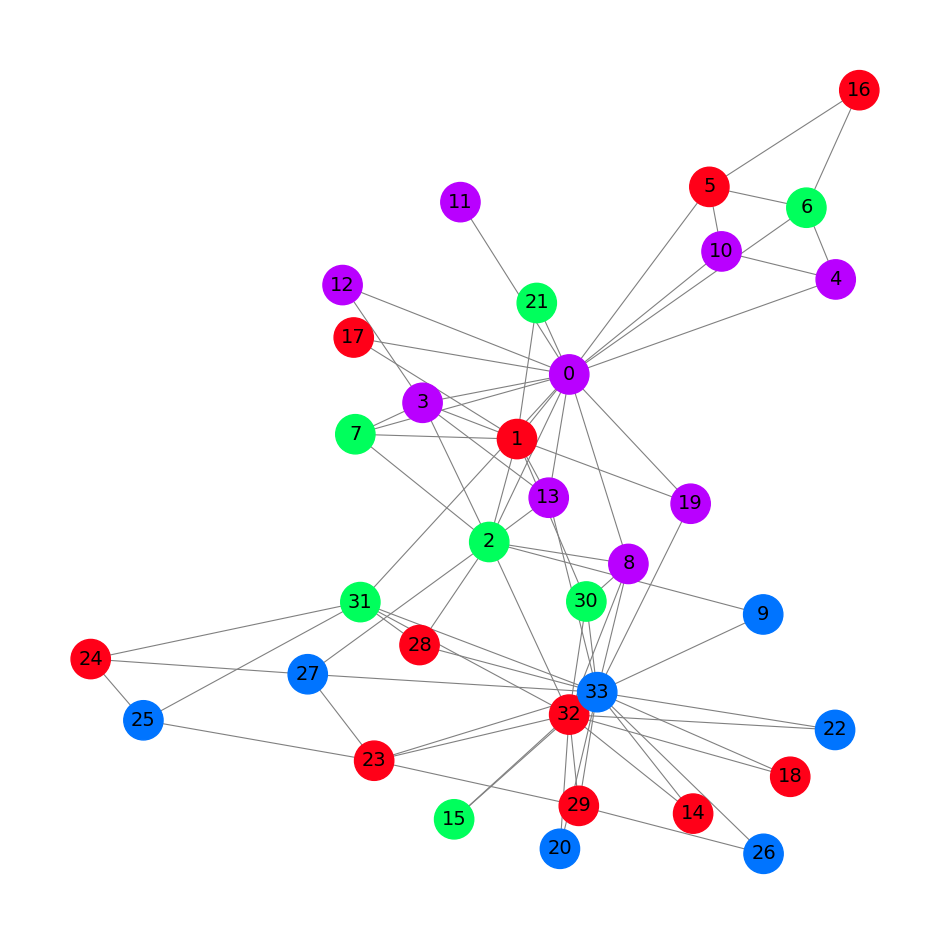

In [139]:
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                pos=nx.spring_layout(G, seed=0),
                with_labels=True,
                node_size=800,
                node_color=data.y,
                cmap="hsv",
                vmin=-2,
                vmax=3,
                width=0.8,
                edge_color="grey",
                font_size=14
                )
plt.show()

In [140]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, num_countries)
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z
 
model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [141]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

def accuracy(pred_y, y):
    return (pred_y == y).sum() / len(y)

In [142]:
from tqdm import tqdm

In [143]:
embeddings = []
losses = []
accuracies = []
outputs = []

for epoch in tqdm(range(200)):
    optimizer.zero_grad()
    h,z = model(data.x, data.edge_index)
    loss = loss_fn(z, data.y)
    acc = accuracy(z.argmax(dim=1), data.y)
    loss.backward()
    optimizer.step()
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))
    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch   0 | Loss: 1.55 | Acc: 20.59%
Epoch  10 | Loss: 1.37 | Acc: 20.59%
Epoch  20 | Loss: 1.22 | Acc: 52.94%
Epoch  30 | Loss: 1.08 | Acc: 52.94%
Epoch  40 | Loss: 0.95 | Acc: 58.82%
Epoch  50 | Loss: 0.83 | Acc: 67.65%
Epoch  60 | Loss: 0.73 | Acc: 76.47%
Epoch  70 | Loss: 0.64 | Acc: 79.41%
Epoch  80 | Loss: 0.56 | Acc: 85.29%
Epoch  90 | Loss: 0.48 | Acc: 88.24%


100%|██████████| 200/200 [00:00<00:00, 1649.88it/s]

Epoch 100 | Loss: 0.41 | Acc: 91.18%
Epoch 110 | Loss: 0.34 | Acc: 91.18%
Epoch 120 | Loss: 0.29 | Acc: 94.12%
Epoch 130 | Loss: 0.24 | Acc: 94.12%
Epoch 140 | Loss: 0.20 | Acc: 97.06%
Epoch 150 | Loss: 0.16 | Acc: 100.00%
Epoch 160 | Loss: 0.12 | Acc: 100.00%
Epoch 170 | Loss: 0.10 | Acc: 100.00%
Epoch 180 | Loss: 0.08 | Acc: 100.00%
Epoch 190 | Loss: 0.07 | Acc: 100.00%


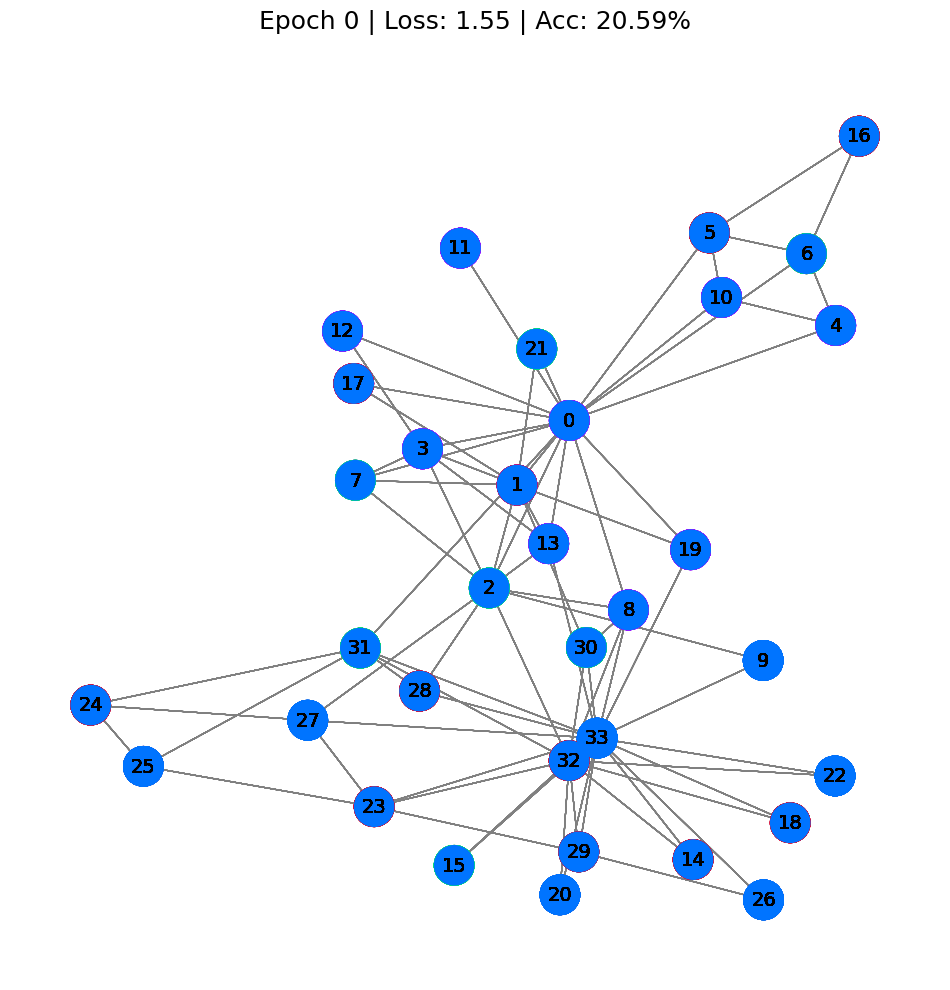

In [144]:
from IPython.display import HTML
from matplotlib import animation

plt.rcParams["animation.bitrate"] = 3000

def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i].numpy(),
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i].item():.2f} | Acc: {accuracies[i].item()*100:.2f}%',
              fontsize=18, pad=20)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
anim = animation.FuncAnimation(fig, animate, np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())
display(html)

Final embeddings = torch.Size([34, 3])
tensor([[1.8801e-01, 2.2663e+00, 0.0000e+00],
        [1.0725e+00, 1.2115e+00, 0.0000e+00],
        [7.2550e-01, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.1517e+00, 0.0000e+00],
        [0.0000e+00, 1.2421e+00, 0.0000e+00],
        [1.2418e+00, 1.2316e+00, 8.4275e-01],
        [1.2834e+00, 1.7339e-01, 0.0000e+00],
        [9.9898e-01, 1.9426e-01, 0.0000e+00],
        [1.3043e-02, 8.3958e-01, 0.0000e+00],
        [0.0000e+00, 1.9016e-01, 2.3276e+00],
        [0.0000e+00, 1.2637e+00, 0.0000e+00],
        [0.0000e+00, 1.9994e+00, 0.0000e+00],
        [0.0000e+00, 1.7998e+00, 0.0000e+00],
        [0.0000e+00, 1.2453e+00, 3.8439e-02],
        [1.6129e+00, 1.2171e+00, 9.6252e-01],
        [1.0487e+00, 0.0000e+00, 0.0000e+00],
        [2.2076e+00, 2.9729e-01, 1.0681e+00],
        [1.3624e+00, 1.4308e+00, 0.0000e+00],
        [1.4347e+00, 1.1522e+00, 1.0168e+00],
        [1.9759e-04, 1.1003e+00, 8.6526e-02],
        [4.6668e-01, 0.0000e+00, 1.5836e+

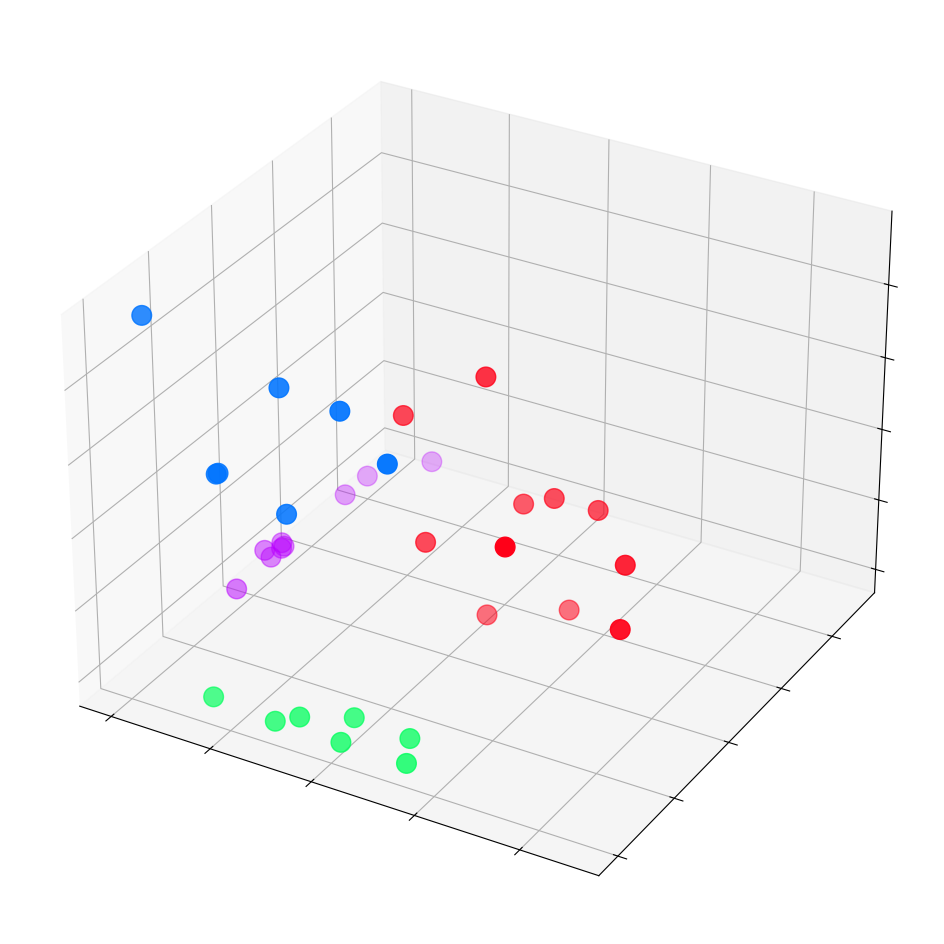

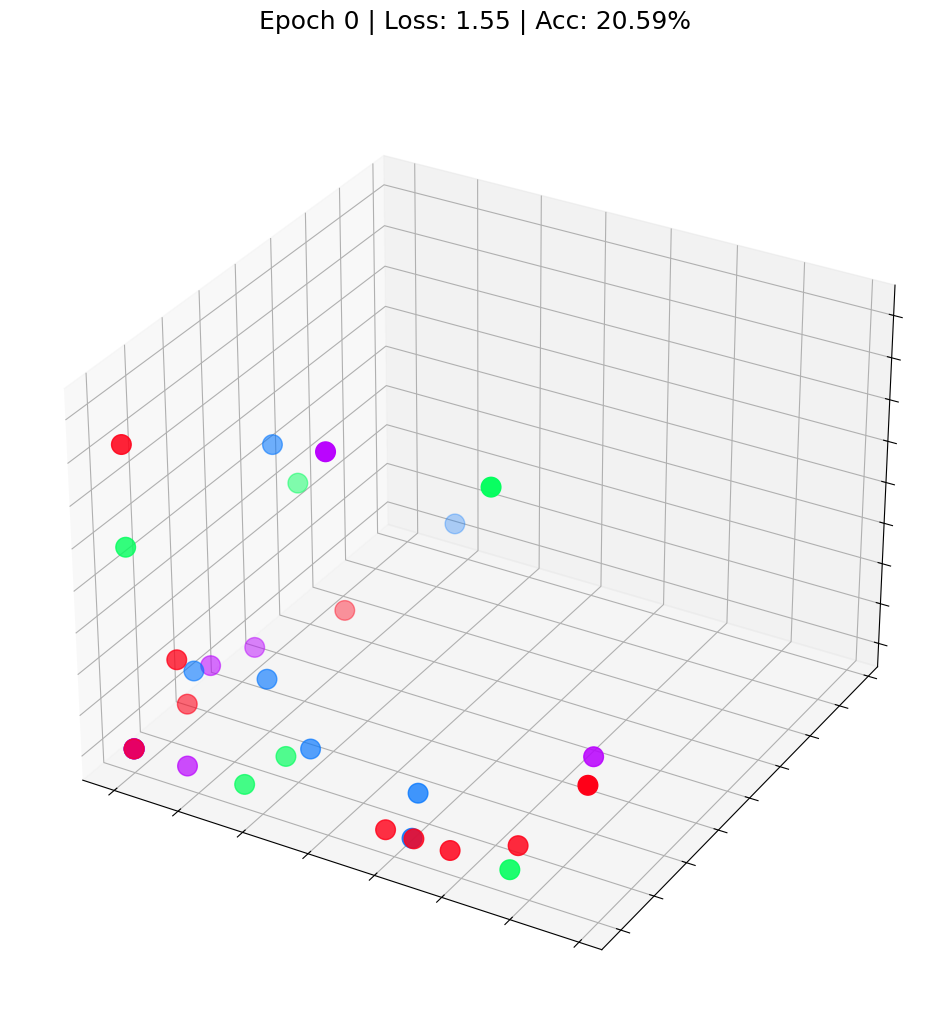

In [145]:
# 3D Embeddings Visualization
print(f'Final embeddings = {h.shape}')
print(h)

embed = h.detach().cpu().numpy()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
plt.show()

def animate_3d(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
               s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i].item():.2f} | Acc: {accuracies[i].item()*100:.2f}%',
              fontsize=18, pad=40)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
anim = animation.FuncAnimation(fig, animate_3d, np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())
display(html)